### 주문량 상위 10개 메뉴 - 막대그래프

In [9]:
import pandas as pd
# 메뉴만 나와있는 데이터 불러오기
df = pd.read_csv('../resource/merge_menu_sum.csv')
df.head()

,고구마라떼,녹차라떼,딸기라떼,딸기스무디,딸기연유라떼 14oz,레모니카노,레몬글라스,레몬에이드,레몬차,레몬차 ICE,...,페퍼민트,플레인스무디,핫초코,햄.치즈샌드위치,홍차라떼,화이트모카,화이트민트초코라떼,히비스커스,아이스아메리카노,아메리카노
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,3,2
3,1,1,0,0,2,0,0,1,0,0,...,0,0,1,0,0,1,0,0,4,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,6,5


In [10]:
# 칼럼별로 합계 내기
sum = df.sum()
df_sum = pd.DataFrame(sum)
df_sum

,0
고구마라떼,591
녹차라떼,338
딸기라떼,12
딸기스무디,156
딸기연유라떼 14oz,947
...,...
화이트모카,63
화이트민트초코라떼,10
히비스커스,40
아이스아메리카노,11947


In [11]:
# 칼럼명 변경
df_sum.rename(columns={0: 'count'}, inplace=True)
df_sum.head(1)

,count
고구마라떼,591


In [12]:
# 내림차순으로 정렬
df_sorted = df_sum.sort_values(by='count', ascending=False)

# 상위 10개만 출력
df_10 = df_sorted.head(10)
df_10.head(3)

,count
복숭아아이스티,16515
샷추가,14073
아이스아메리카노,11947


In [13]:
# 'menu' 칼럼 추가
df_10_with_menu = df_10.reset_index()
df_10_with_menu[['index', 'count']]
df_10_with_menu.rename(columns={'index': 'menu'}, inplace=True)
df_10_with_menu.head(3)

,menu,count
0,복숭아아이스티,16515
1,샷추가,14073
2,아이스아메리카노,11947


In [14]:
df_10_with_menu['menu'].tolist()

['복숭아아이스티',
 '샷추가',
 '아이스아메리카노',
 '아이스카페라떼',
 '아이스바닐라라떼',
 '아메리카노',
 '카페라떼',
 '석류아이스티',
 '젤라또',
 '햄.치즈샌드위치']

In [15]:
df_10_with_menu['count'].tolist()

[16515, 14073, 11947, 3207, 2436, 2400, 1730, 1718, 1698, 1574]

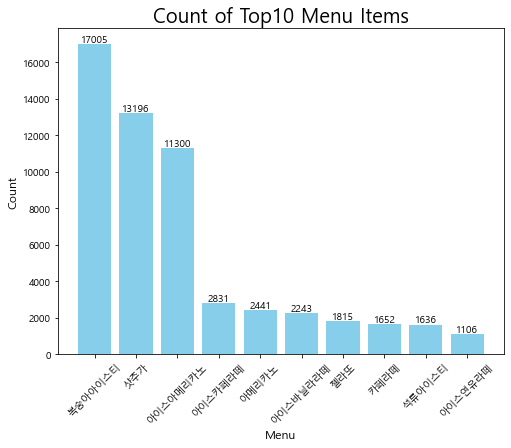

In [16]:
import matplotlib.pyplot as plt
#from matplotlib.transforms import Bbox

menu_items = ['복숭아아이스티',
 '샷추가',
 '아이스아메리카노',
 '아이스카페라떼',
 '아메리카노',
 '아이스바닐라라떼',
 '젤라또',
 '카페라떼',
 '석류아이스티',
 '아이스연유라떼']

counts = [17005, 13196, 11300, 2831, 2441, 2243, 1815, 1652, 1636, 1106]

# 막대 그리프 그리기
plt.figure(figsize=(8, 6))   # 그래프 크기 설정

bars = plt.bar(menu_items, counts, color='skyblue')

plt.xlabel('Menu', fontsize=12)   # x축 레이블
plt.ylabel('Count', fontsize=12)   # y축 레이블
plt.title('Count of Top10 Menu Items', fontsize=20)   # 그래프 제목
plt.xticks(rotation=45, fontsize=10)   # x축 레이블 회전

plt.xticks(menu_items)

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), count,
             ha='center', va='bottom', fontsize=10)

plt.rcParams['font.family'] = 'Malgun Gothic'     # 한국어 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False        # 마이너스 깨짐 방지

import matplotlib
import platform

# Window
# 한글 안께지게
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

plt.savefig('bargraph_menu.png')
plt.show()